# **Data Preprocessing and Feature Engineering in Machine Learning**

#### 1. Data Exploration and Preprocessing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\Parvathy Shine\Desktop\Assignments\12. EDA2\EDA2\adult_with_headers.csv")
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
df.info() # Combination of numerical and categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum() # No missing values so need of Handling it .

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.drop(['fnlwgt','relationship','native_country'],axis=1,inplace=True) #Removing unnecessary columns

#### Scalling Techniques :

1. Standard Scaling : Used when Features have different units. It changes the data to around 0 mean and standard deviation of 1, keeps Outliers.
<br>Used in models : Logistic Regression/Linear Regression, SVM, K-Means, PCA and KNN.
<br>2. MinMaxScaler : Used to preserve the original distributions of features and scales to range [0,1]. It compresses the Outliers.
<br>Used : Neural Networks , we need data in range [0,1].

In [7]:
# So applying the scaling techniques accordingly:

#Selecting the columns to apply both
Std_cols= ['age','education_num','capital_gain','capital_loss']
Min_cols = ['hours_per_week']

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply Standard Scaling
scaler = StandardScaler()
sc_df = pd.DataFrame(scaler.fit_transform(df[Std_cols]), columns=Std_cols)

# Apply Min-Max Scaling
mmscaler = MinMaxScaler()
mm_df = pd.DataFrame(mmscaler.fit_transform(df[Min_cols]), columns=Min_cols)

# Combine both scaled DataFrames
scaled_df = pd.concat([sc_df, mm_df], axis=1)

df

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,<=50K


In [9]:
#Selecting Catgorical variables:

cat_cols=df.select_dtypes('object')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for < 5 unique values:

one_hot_cols = [col for col in cat_cols if df[col].nunique() < 5]
# col- variable name, for col in cat_cols-loops through each column , if df[col].nunique()- no of unique cols , greater than 5
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Label Encoding for >= 5 unique values

label_encoder = LabelEncoder()
label_cols = [col for col in cat_cols if df[col].nunique() >= 5]
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

#### One Hot encoding:
Pros - It preserves information and has no ordering.
<br>Cons - It increases dimensionality and sparse matrix

#### Label Encoding:
Pros - It is efficient and shows only one column.It keeps the memory low.
<br>Cons - It show ordinal relationship and can be misleading if not done properly.
    

#### 3. Feature Engineering:

In [10]:
# Creating new 2 features:

# Total_capital = Combines both the features to give the total capital
df['total_capital'] = df['capital_gain'] - df['capital_loss']

# edu_per_age = Show how mcuh educated he is related to his age
df['edu_per_age'] = df['education_num'] / df['age']

df

,age,workclass,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,total_capital,edu_per_age
0,39,7,9,13,4,1,4,2174,0,40,1,0,2174,0.333333
1,50,6,9,13,2,4,4,0,0,13,1,0,0,0.260000
2,38,4,11,9,0,6,4,0,0,40,1,0,0,0.236842
3,53,4,1,7,2,6,2,0,0,40,1,0,0,0.132075
4,28,4,9,13,2,10,2,0,0,40,0,0,0,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,4,0,0,38,0,0,0,0.444444
32557,40,4,11,9,2,7,4,0,0,40,1,1,0,0.225000
32558,58,4,11,9,6,1,4,0,0,40,0,0,0,0.155172
32559,22,4,11,9,4,1,4,0,0,20,1,0,0,0.409091


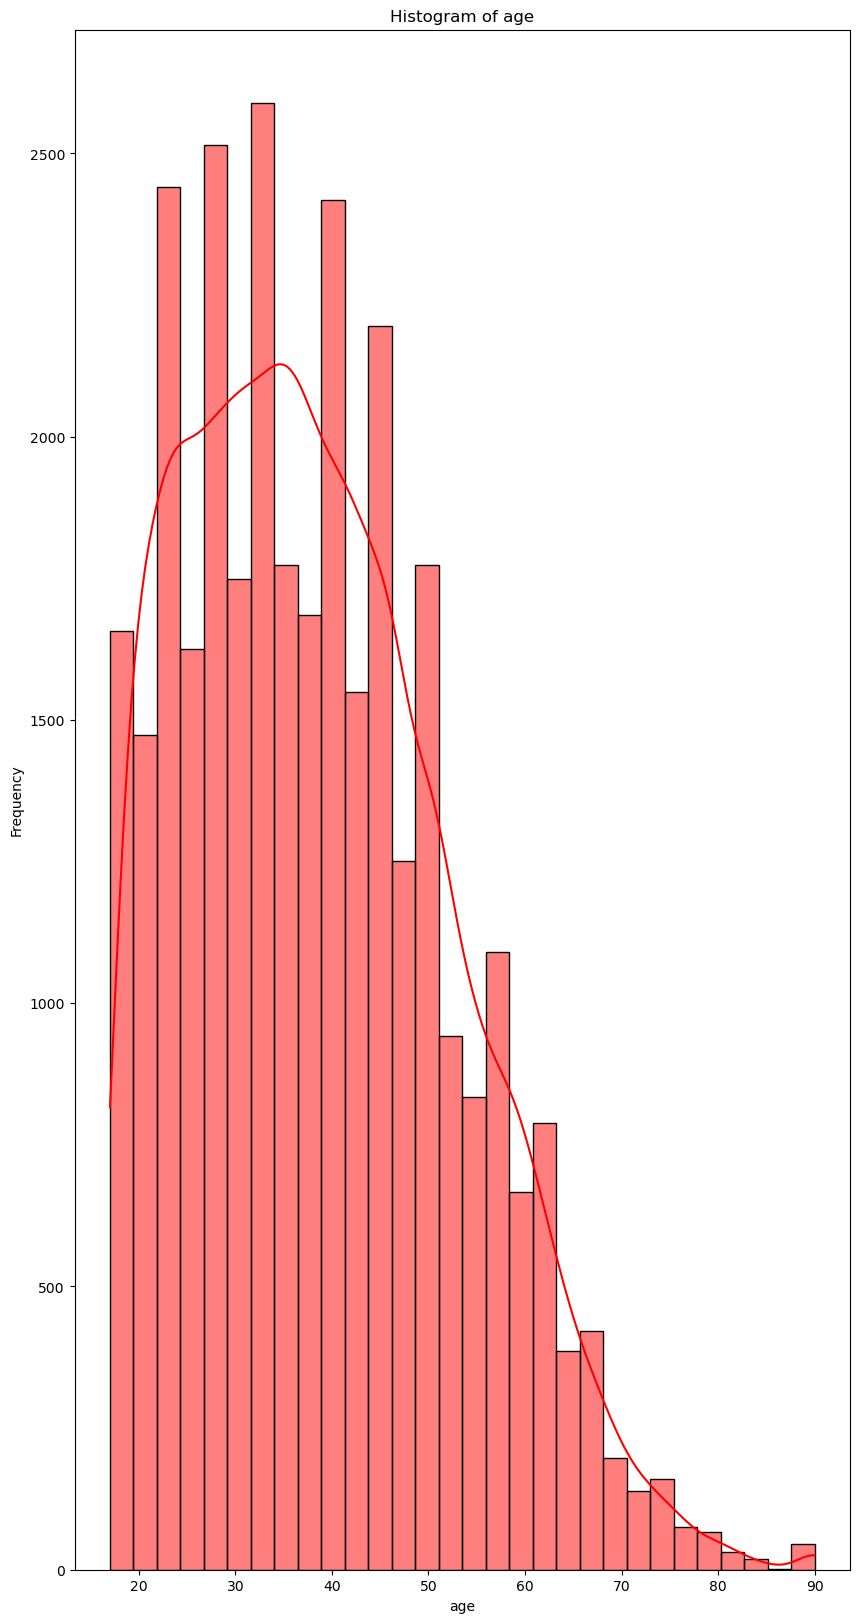

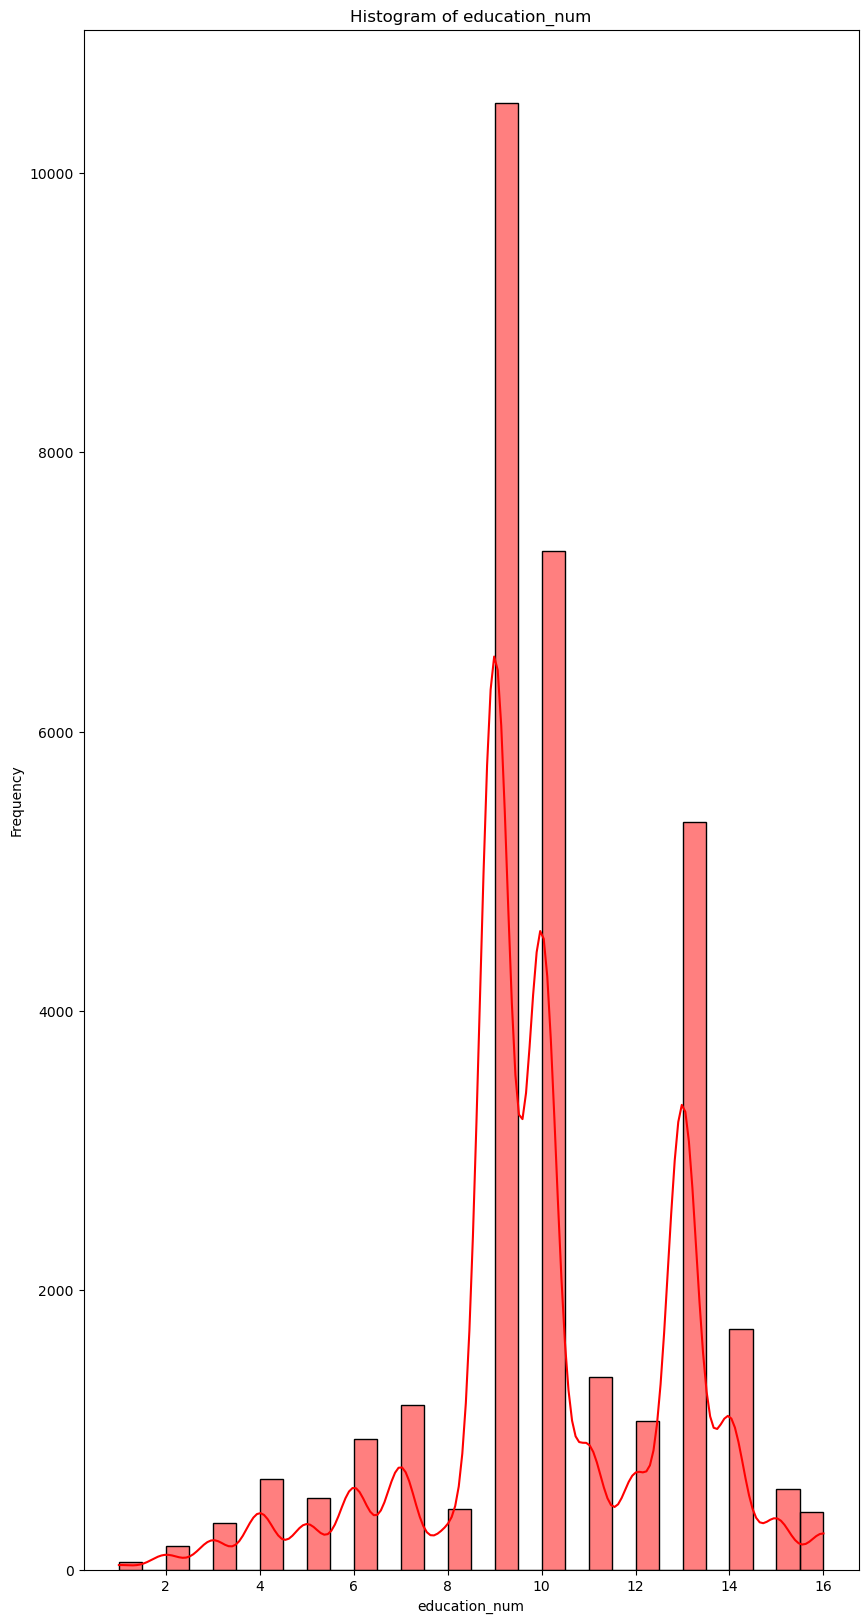

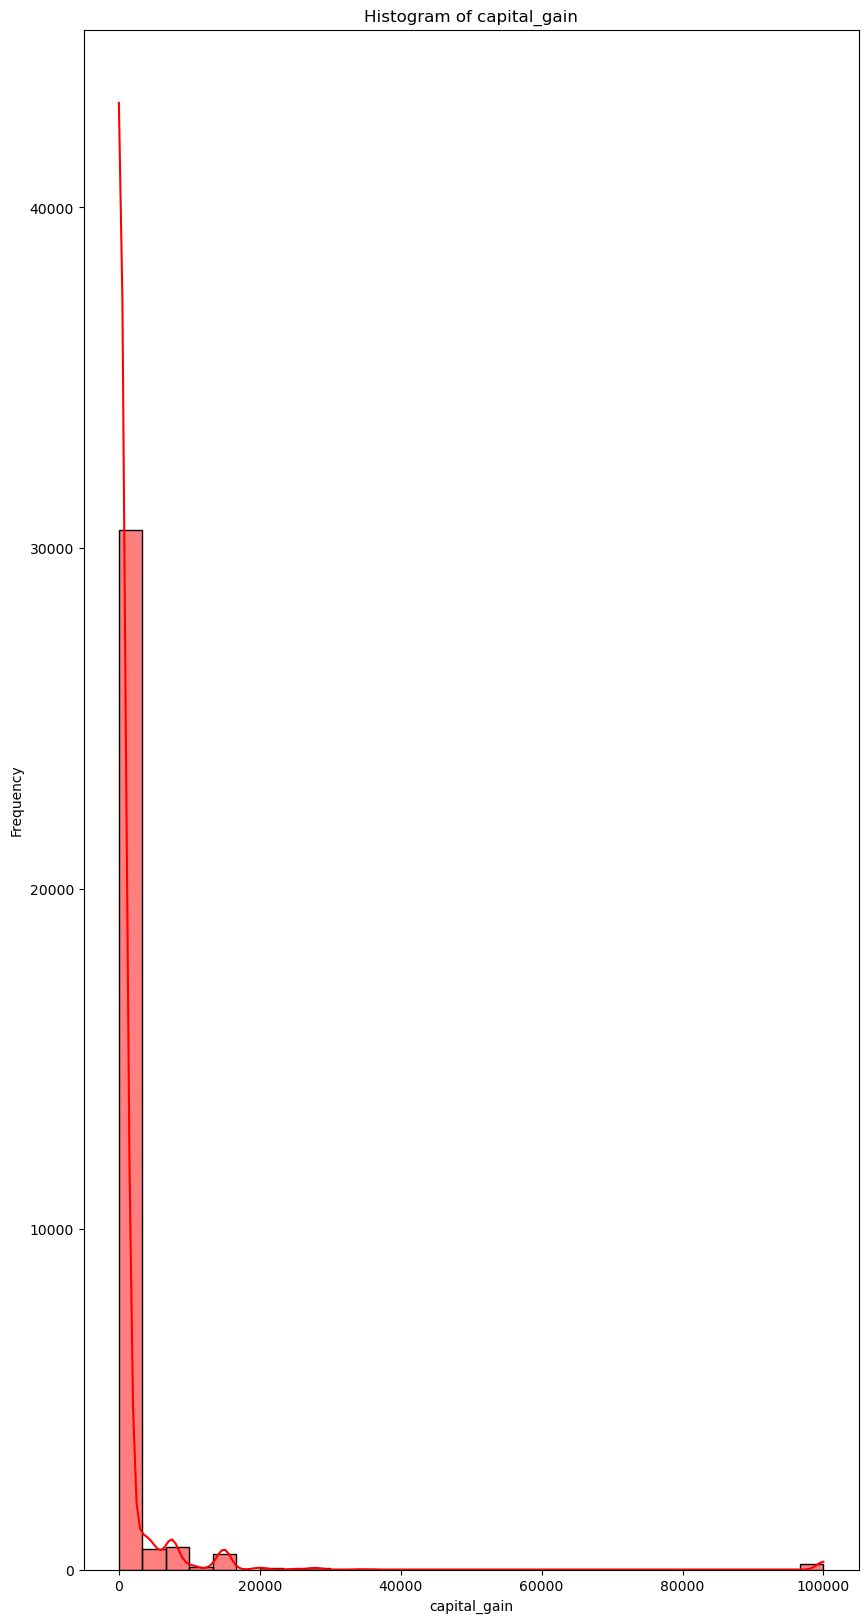

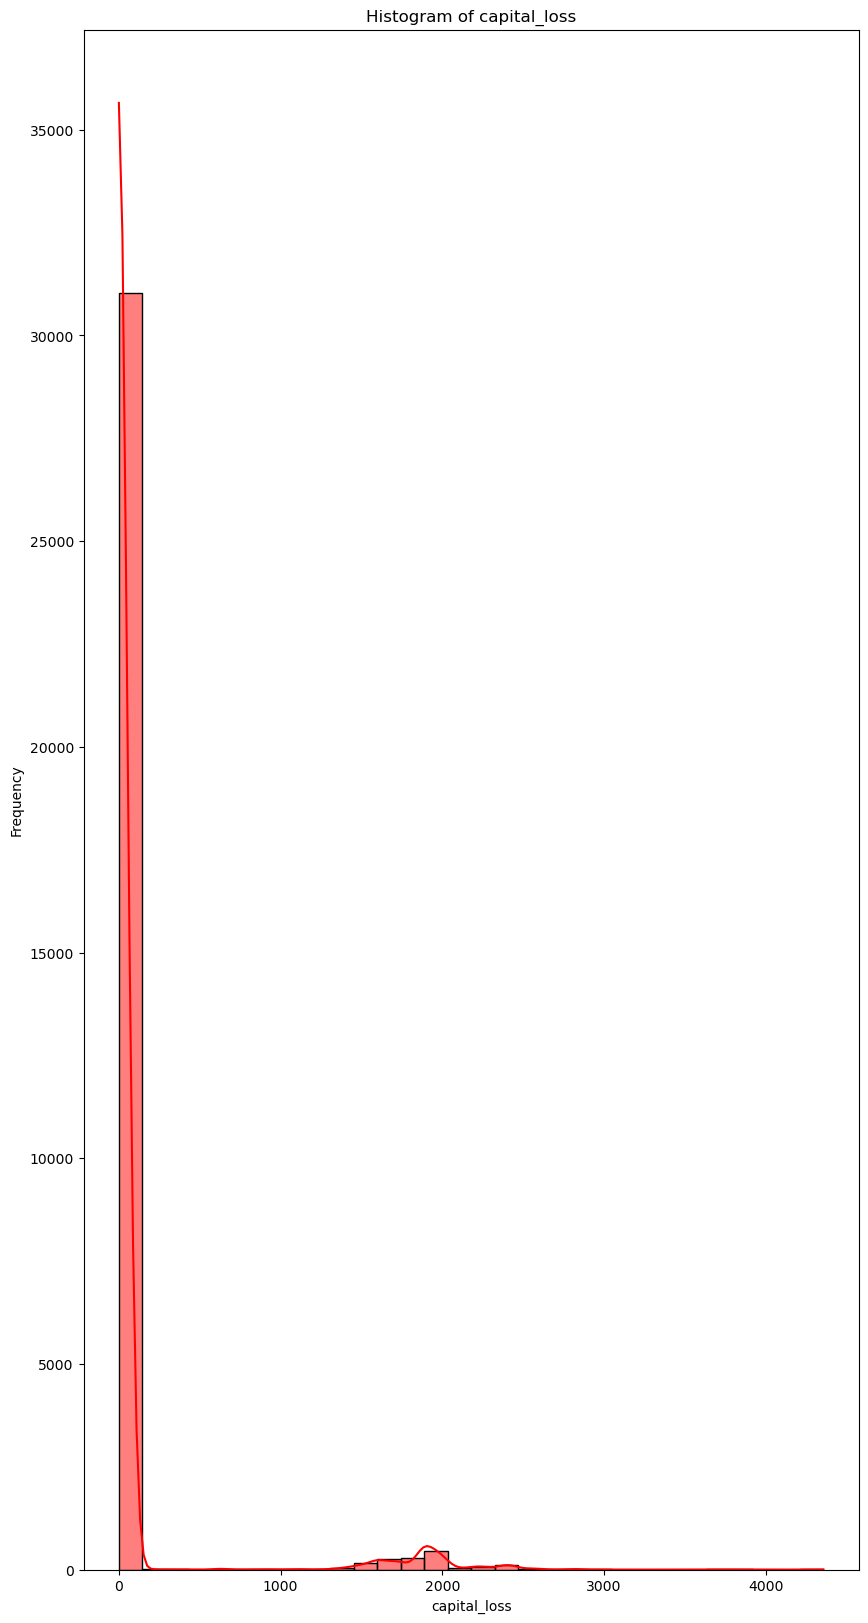

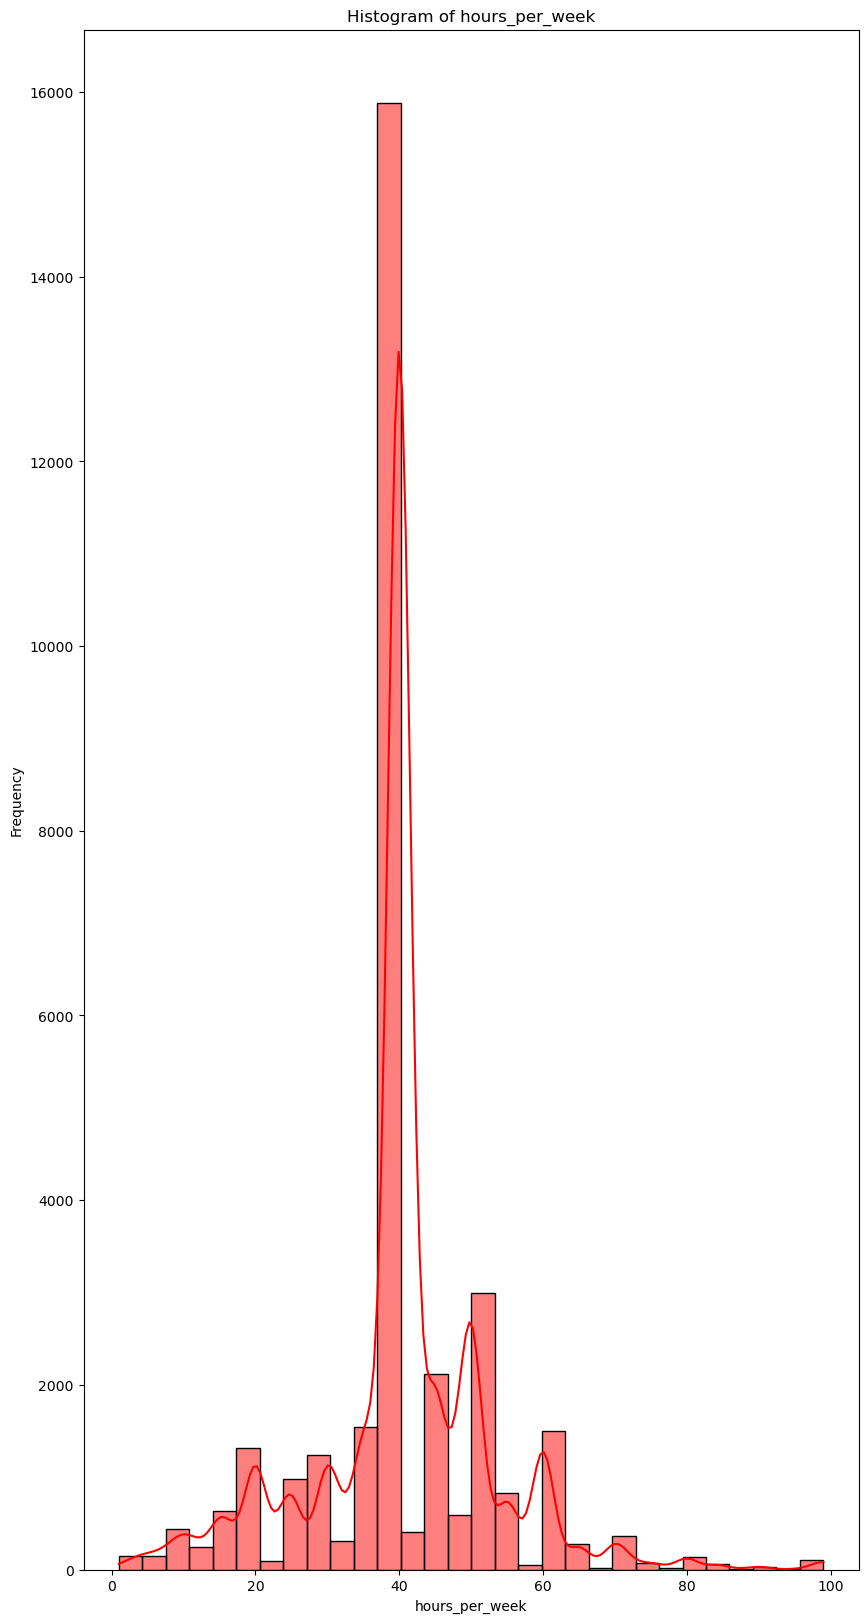

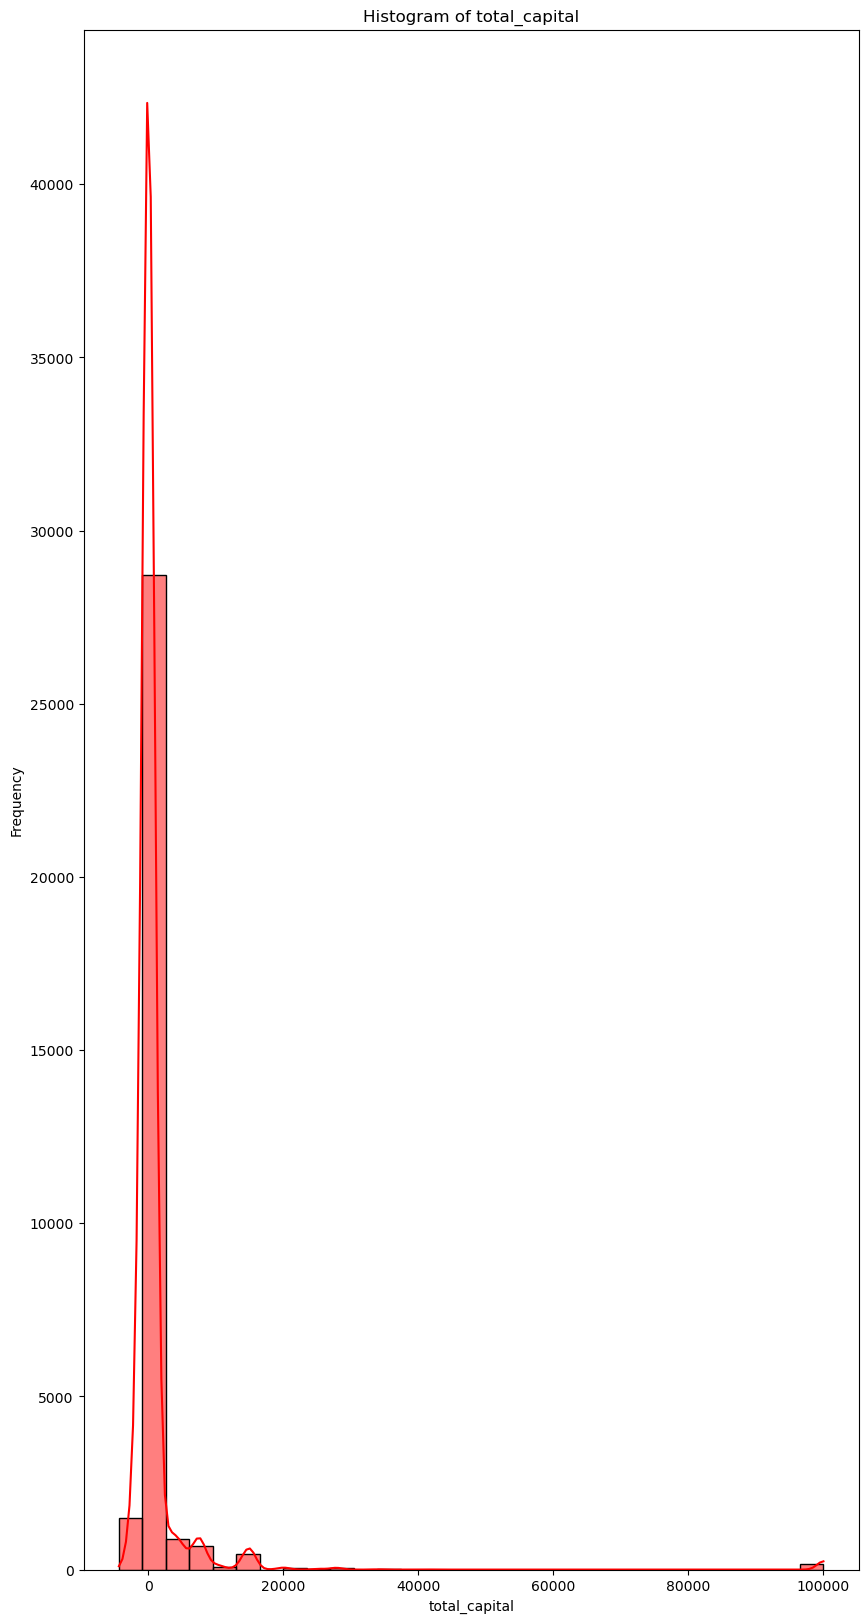

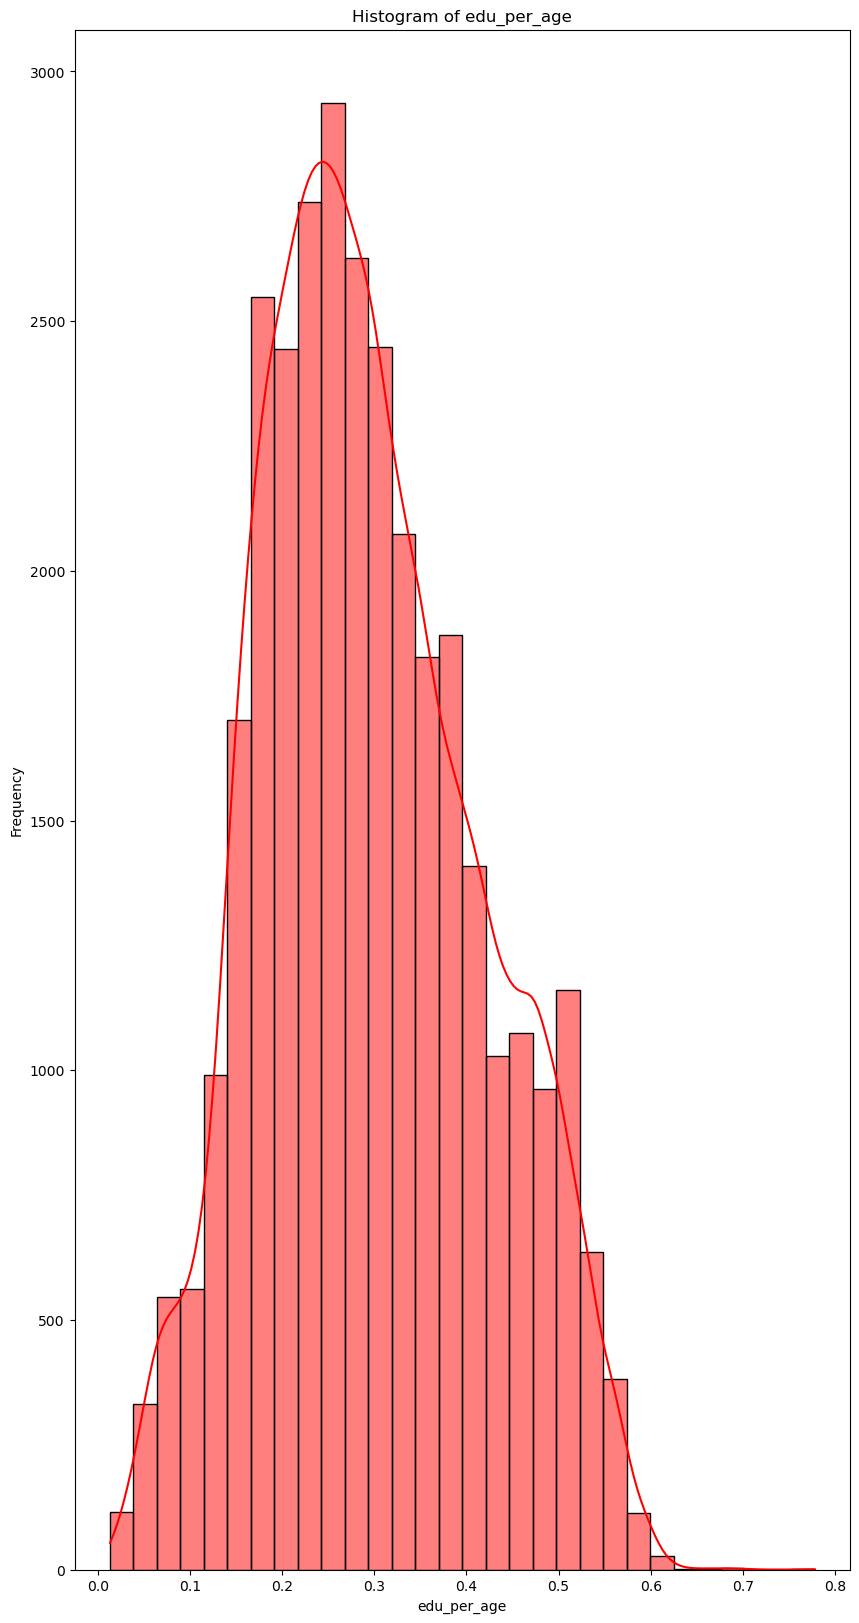

In [11]:
# Ploting a histogram to check the skewness

import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(10,20))
    sns.histplot(df[col], bins=30, kde=True, color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
#Hours per week is skewed , so we will apply log transformation to normalise it 

In [12]:
# Applying log transform to hours-per-week:

import numpy as np
df['Log_hours-per-week'] = np.log1p(df['hours_per_week'])

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'race', 'capital_gain', 'capital_loss', 'hours_per_week',
       'sex_ Male', 'income_ >50K', 'total_capital', 'edu_per_age',
       'Log_hours-per-week'],
      dtype='object')

In [13]:
df.drop(['education','capital_loss','capital_gain','hours_per_week'],axis=1,inplace=True) # droping the unnecessary coloumns bcoz there is similar info one way or another.

#### 4. Feature Selection:

In [1]:
#Isolation Forest:
from sklearn.ensemble import IsolationForest

# Selecting only numerical columns for Isolation Forest
num_cols = ['age', 'education_num', 'total_capital', 'edu_per_age', 'Log_hours-per-week']

# Initialize the Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)

# Fit and predict
outliers = iso.fit_predict(df[num_cols]) 

# Keep only the inliers (where prediction is 1)
df = df[outliers == 1]

NameError: name 'df' is not defined

Outliers can skew the distribution of features and lead to Overfitting, Poor generalization and distorted metrics.
We can remove it using Isolation forest algorithm.

#### PPS (Predictive Power Score) -
Unlike correlation (which captures only linear relationships), PPS captures non-linear and asymmetric relationships, and is ideal for classification tasks like income_ >50K.

In [15]:
#Since pps score works only with pandas .1 we are using an alternative:
X = df.drop('income_ >50K', axis=1) #Features
y = df['income_ >50K'] #Target

# Calculate mutual info for each feature
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_scores.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_scores)

              Feature  Importance
3      marital_status    0.107051
7       total_capital    0.084561
8         edu_per_age    0.075456
0                 age    0.057551
4          occupation    0.053912
2       education_num    0.049450
9  Log_hours-per-week    0.033199
6           sex_ Male    0.026040
1           workclass    0.022552
5                race    0.008765


In [16]:
# The top 5 features related to the income is marital_status,total_capital,edu_per_age,age,occupation

In [19]:
#Correlation
corr_matrix = df.corr()
print(corr_matrix)

                         age  workclass  education_num  marital_status  \
age                 1.000000   0.032728       0.036610       -0.301085   
workclass           0.032728   1.000000       0.035748       -0.056768   
education_num       0.036610   0.035748       1.000000       -0.036055   
marital_status     -0.301085  -0.056768      -0.036055        1.000000   
occupation          0.001457   0.217326       0.111886       -0.005599   
race                0.027196   0.052691       0.028036       -0.072966   
sex_ Male           0.084734   0.090574       0.000507       -0.109054   
income_ >50K        0.241032   0.034364       0.299071       -0.186099   
total_capital       0.042529   0.005339       0.035338       -0.043278   
edu_per_age        -0.801301  -0.038916       0.473335        0.314605   
Log_hours-per-week  0.120511   0.096660       0.103123       -0.171615   

                    occupation      race  sex_ Male  income_ >50K  \
age                   0.001457  0.027196  

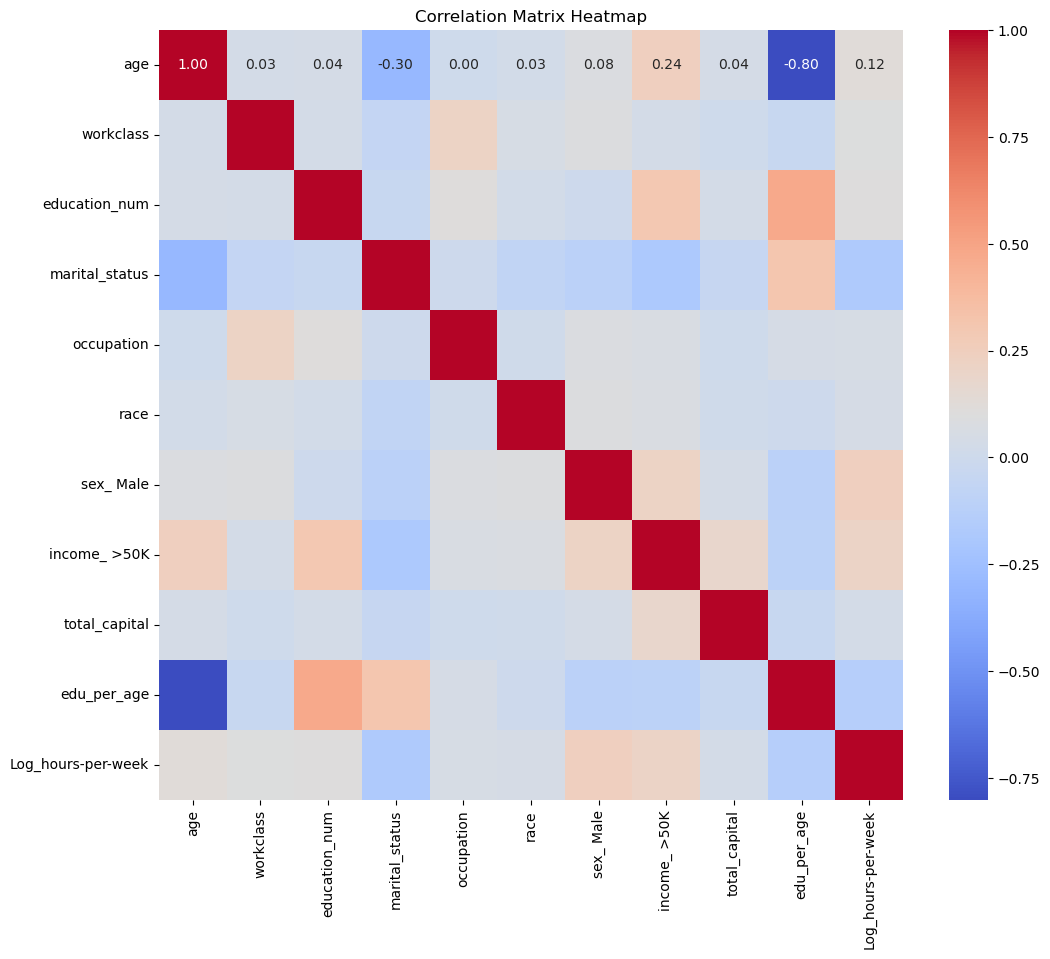

In [18]:
#Visualising the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# From correlation matrix only age, education_num,sex_male,total_capital,log_hours_per_week is showing correlation with income.

**Comparison of PPS scores and correlation matrix**

* The PPS scores can detect non-linear relationships between features, while the correlation matrix only detects linear relationships.
* The PPS scores are more robust to outliers and noise in the data, while the correlation matrix is more sensitive to outliers and noise.
* The PPS scores can handle categorical features, while the correlation matrix requires numerical features.